# Proyecto de Sistema de clasificación de imágenes

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image 

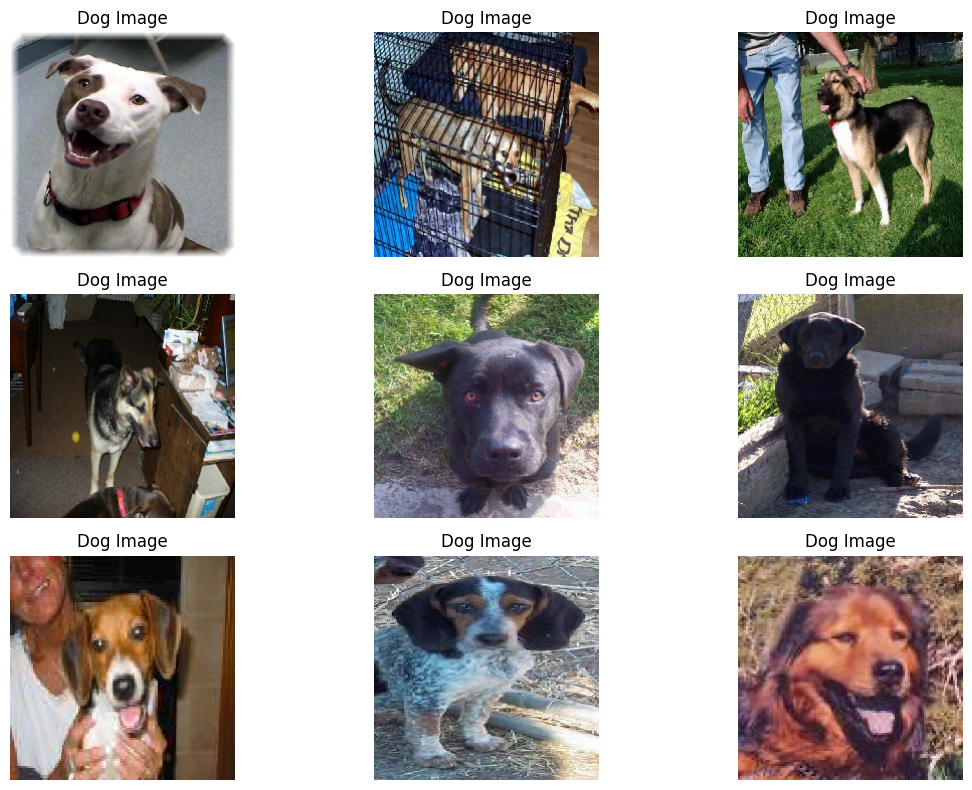

In [4]:
# Ruta al directorio de imágenes
data_dir = "../data/train"
dog_subfolder = os.path.join(data_dir, "dog")

# Lista de nombres de archivos de imagen en la subcarpeta
dog_image_files = os.listdir(dog_subfolder)

# Cargar las primeras nueve imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar si es necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalizar a [0, 1]
    dog_images.append(img_array)

# Mostrar las imágenes en una sola figura
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

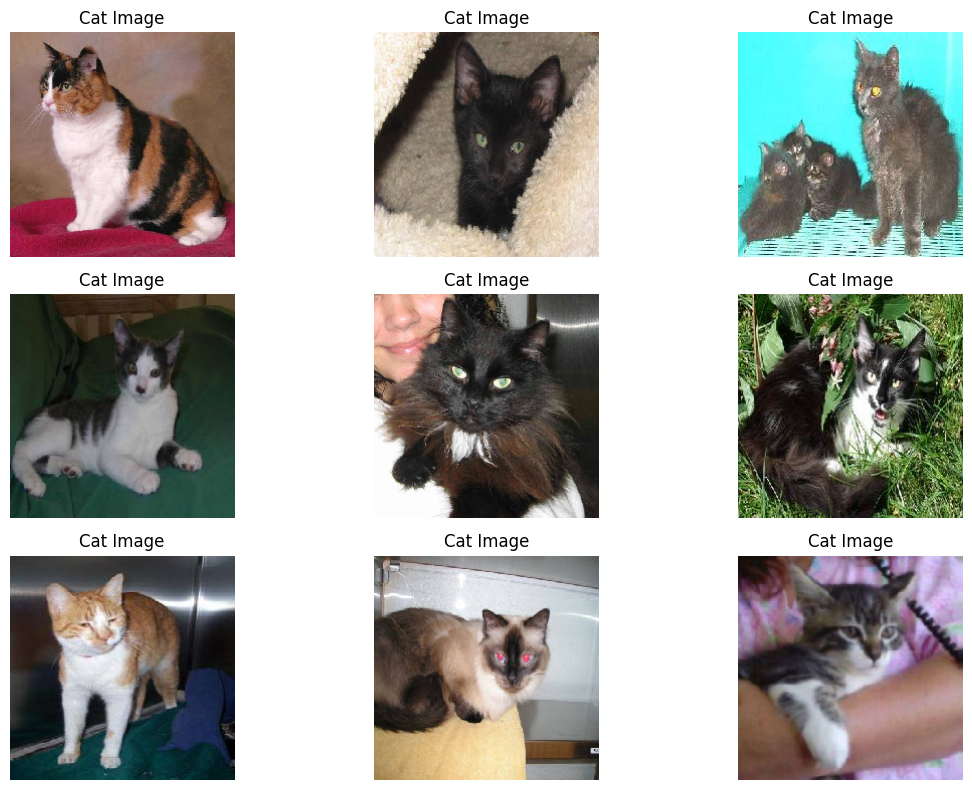

In [5]:
# Ruta al directorio base
data_dir = "../data/train"
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener lista de archivos de imagen
cats_image_files = os.listdir(cats_subfolder)

# Cargar hasta 9 imágenes de gatos
cats_images = []
for i in range(min(9, len(cats_image_files))):
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar si se desea
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalizar a [0, 1]
    cats_images.append(img_array)

# Visualizar las imágenes
plt.figure(figsize=(12, 8))
for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir parámetros
base_dir = "../data"
img_size = (220, 220)
batch = 8
mode = "categorical"

# Crear generadores para entrenamiento y prueba
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Preparar datasets usando los generadores
train_data = train_gen.flow_from_directory(
    directory=os.path.join(base_dir, "train"),
    target_size=img_size,
    batch_size=batch,
    class_mode=mode
)

test_data = test_gen.flow_from_directory(
    directory=os.path.join(base_dir, "train"),  # usa el mismo dir, pero puede cambiarse
    target_size=img_size,
    batch_size=batch,
    class_mode=mode
)

Found 404 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

# Inicializar modelo
cnn_model = Sequential()

# Bloque 1
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(220, 220, 3)))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Bloque 2
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Bloque 3
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Bloque 4
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Bloque 5
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Clasificación (fully connected layers)
cnn_model.add(Flatten())
cnn_model.add(Dense(4096))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(4096))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(2))  # Para dos clases
cnn_model.add(Activation('softmax'))  # Activación final para clasificación

# Compilación opcional (puedes usarla más adelante)
# cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
from tensorflow.keras.optimizers import Adam

# Configuración del optimizador
opt = Adam(learning_rate=1e-3)

# Compilación del modelo con configuración personalizada
cnn_model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Entrenamiento del modelo con una época
epochs_to_train = 1
history = cnn_model.fit(
    x=train_data,
    epochs=epochs_to_train,
    verbose=1  # Muestra el progreso del entrenamiento
)


/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 578s 11s/step - accuracy: 0.5023 - loss: 2.3884


In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Definir callbacks de forma segura
model_checkpoint = ModelCheckpoint(
    filepath="../models/vgg16_1.h5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,
    verbose=1,
    mode="auto"
)

early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=1,
    mode="auto"
)

# Entrenamiento con control de pasos y validación
history = cnn_model.fit(
    train_data,
    steps_per_epoch=100,
    validation_data=test_data,
    validation_steps=10,
    epochs=3,
    callbacks=[model_checkpoint, early_stopping],
    verbose=1
)


Epoch 1/3
 51/100 ━━━━━━━━━━━━━━━━━━━━ 9:05 11s/step - accuracy: 0.5475 - loss: 0.6930
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 619s 6s/step - accuracy: 0.5230 - loss: 0.6935 - val_accuracy: 0.5500 - val_loss: 0.6926
Epoch 2/3
 51/100 ━━━━━━━━━━━━━━━━━━━━ 9:05 11s/step - accuracy: 0.4771 - loss: 0.6933
Epoch 2: val_accuracy did not improve from 0.55000
100/100 ━━━━━━━━━━━━━━━━━━━━ 600s 6s/step - accuracy: 0.4725 - loss: 0.6933 - val_accuracy: 0.3625 - val_loss: 0.6942
Epoch 3/3
 51/100 ━━━━━━━━━━━━━━━━━━━━ 8:49 11s/step - accuracy: 0.5222 - loss: 0.6930
Epoch 3: val_accuracy improved from 0.55000 to 0.58750, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 640s 6s/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5875 - val_loss: 0.6930


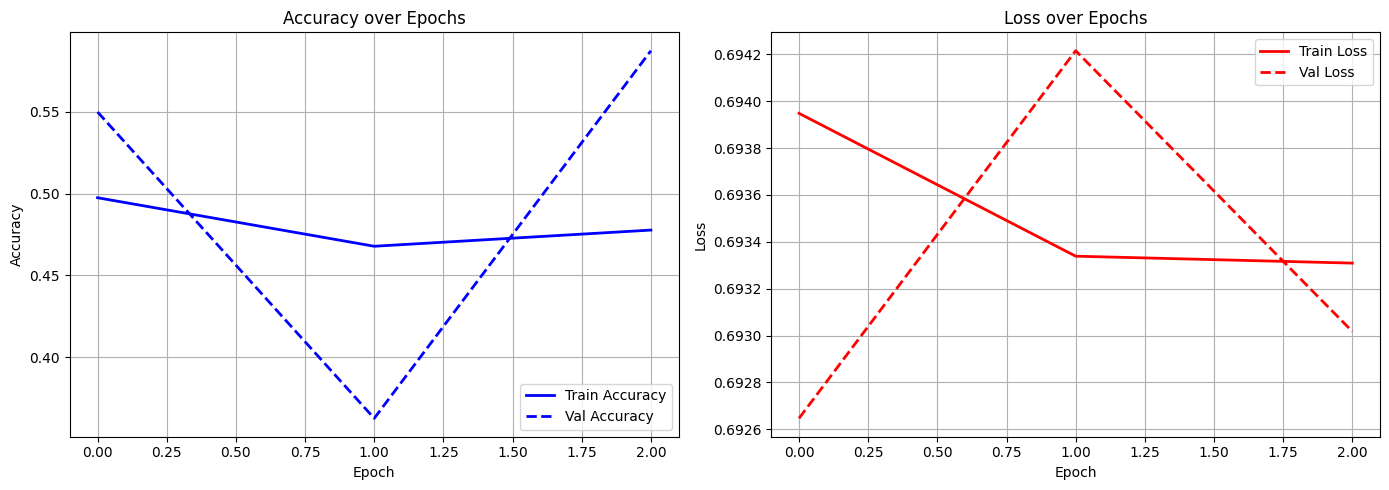

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos del historial
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(len(acc))

# Crear figura con dos subplots
plt.figure(figsize=(14, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy", color="blue", linewidth=2)
plt.plot(epochs_range, val_acc, label="Val Accuracy", color="blue", linestyle="--", linewidth=2)
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss", color="red", linewidth=2)
plt.plot(epochs_range, val_loss, label="Val Loss", color="red", linestyle="--", linewidth=2)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(True)


plt.tight_layout()
plt.show()


Las gráficas muestran que el modelo presenta un comportamiento inestable durante las primeras tres épocas, con una disminución inicial en la precisión de entrenamiento y validación seguida por una ligera recuperación, lo cual sugiere que aún no ha comenzado a generalizar correctamente. La pérdida (loss) se mantiene alta y casi constante, lo que indica que el modelo no está aprendiendo patrones significativos del conjunto de datos. Además, el hecho de que la precisión de validación sea similar o incluso superior a la de entrenamiento podría señalar una alta variabilidad en el proceso de entrenamiento, posiblemente debido a un número bajo de épocas.

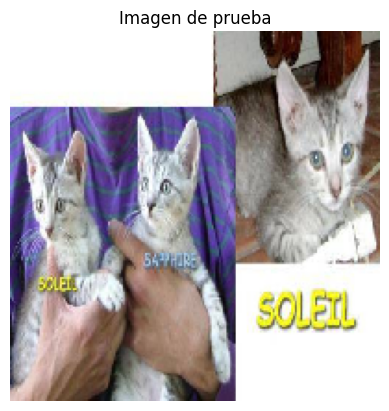

2025-05-14 03:45:40.347318: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-05-14 03:45:40.781435: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-14 03:45:41.354491: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-14 03:45:41.493161: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-14 03:45:41.688160: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2025-05-14 03:45:41.776428: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
Predicción: dog


In [3]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Ruta e información de la imagen
image_path = "../data/test/25.jpg"
img_size = (200, 200)

# Cargar y preprocesar la imagen
input_img = load_img(image_path, target_size=img_size)
img_array = img_to_array(input_img) / 255.0  # Normalizar
img_batch = np.expand_dims(img_array, axis=0)  # Convertir a batch

# Visualizar la imagen
plt.imshow(input_img)
plt.axis("off")
plt.title("Imagen de prueba")
plt.show()

# Cargar modelo y hacer predicción
model_path = "../models/vgg16_1.h5"
model = load_model(model_path)
prediction = model.predict(img_batch)

# Interpretar y mostrar resultado
class_names = ["cat", "dog"]
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicción: {predicted_class}")
